# Goal
Explore raw data from Dataset for Object DeTection in Aerial Images (DOTA)

# Report
1. Show samples from training images
2. Number of training images
3. Scatter plot of image sizes
4. Minimum and maximum width and height of images
5. Summary of image label features
6. Frequency of images by source
7. Distribution of ground sample distances (gsd) of images
8. Frequency of each object type across images
9. Number of objects per image
10. Images by number of each object
11. Co-occurrences and mutual exclusivity of object types across images¶

## Set variables

In [29]:
TRAIN_DIR = "../data/raw/DOTA/training/"
TRAIN_IMAGES_DIR = TRAIN_DIR + "images/"
TRAIN_LABELS_DIR = TRAIN_DIR + "labelTxt/"

## Import

In [36]:
import numpy as np
import pandas as pd
import os
from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

import sys
sys.path.insert(0, "../")
sys.path.insert(1, "../DOTA_devkit/")

import lib.pandas_utilities as pdu
from lib.visualize import PlotOp
from DOTA import DOTA

# Load and preprocess

### Read all labels for objects in images

In [5]:
all_labels_df = pd.DataFrame()

for file in sorted(os.listdir(TRAIN_LABELS_DIR)):
    
    file_path = TRAIN_LABELS_DIR + file
    
    img_id = file[1:5]
    
    with open(file_path) as f:
        img_source = f.readline().split(':')[-1][:-1] # clip last element which is \n
        gsd = f.readline().split(':')[-1][:-1]
    
    label_df = pd.read_csv(
        file_path, 
        sep=" ", skiprows=2, header=None,
        names = ["x1","y1","x2","y2","x3","y3","x4","y4","category","difficulty"]
    )
    
    label_df["img_source"] = img_source
    label_df["gsd"] = gsd
    label_df["img_id"] = img_id
    
    SELECT = ["img_id","img_source","gsd","category","difficulty"]
    label_df = label_df[SELECT]
    
    all_labels_df = pd.concat([all_labels_df, label_df])

### Convert image ids and ground sample distances (gsd) to numeric

In [6]:
all_labels_df["img_id"] = pd.to_numeric(all_labels_df["img_id"], errors="coerce")
all_labels_df["gsd"] = pd.to_numeric(all_labels_df["gsd"], errors="coerce")

### all_img_df keeps one row per image

In [7]:
all_img_df = all_labels_df.drop_duplicates("img_id")

# Report

## 1. Show samples from training images

In [40]:
training = DOTA(TRAIN_DIR)

### An image having both planes and small vehicles in it

isarralike: False
imgids: ['P0038']
filename: ../data/raw/DOTA/training/images/P0038.png


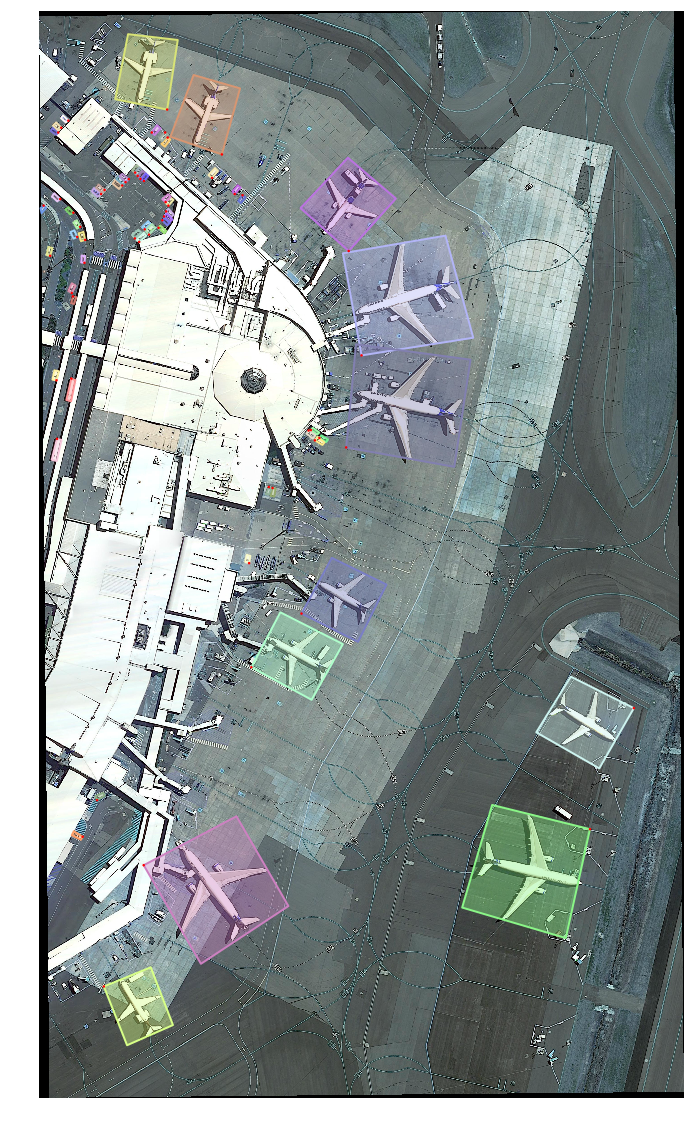

In [41]:
imgids = training.getImgIds(catNms=['plane', 'small-vehicle'])
imgid = imgids[0]
#img = training.loadImgs(imgid)[0]

plt.figure(figsize=(20,20))
annotations = training.loadAnns(imgId=imgid)
training.showAnns(annotations, imgid, 2)

### An image with bridges in it

isarralike: False
imgids: ['P2411']
filename: ../data/raw/DOTA/training/images/P2411.png


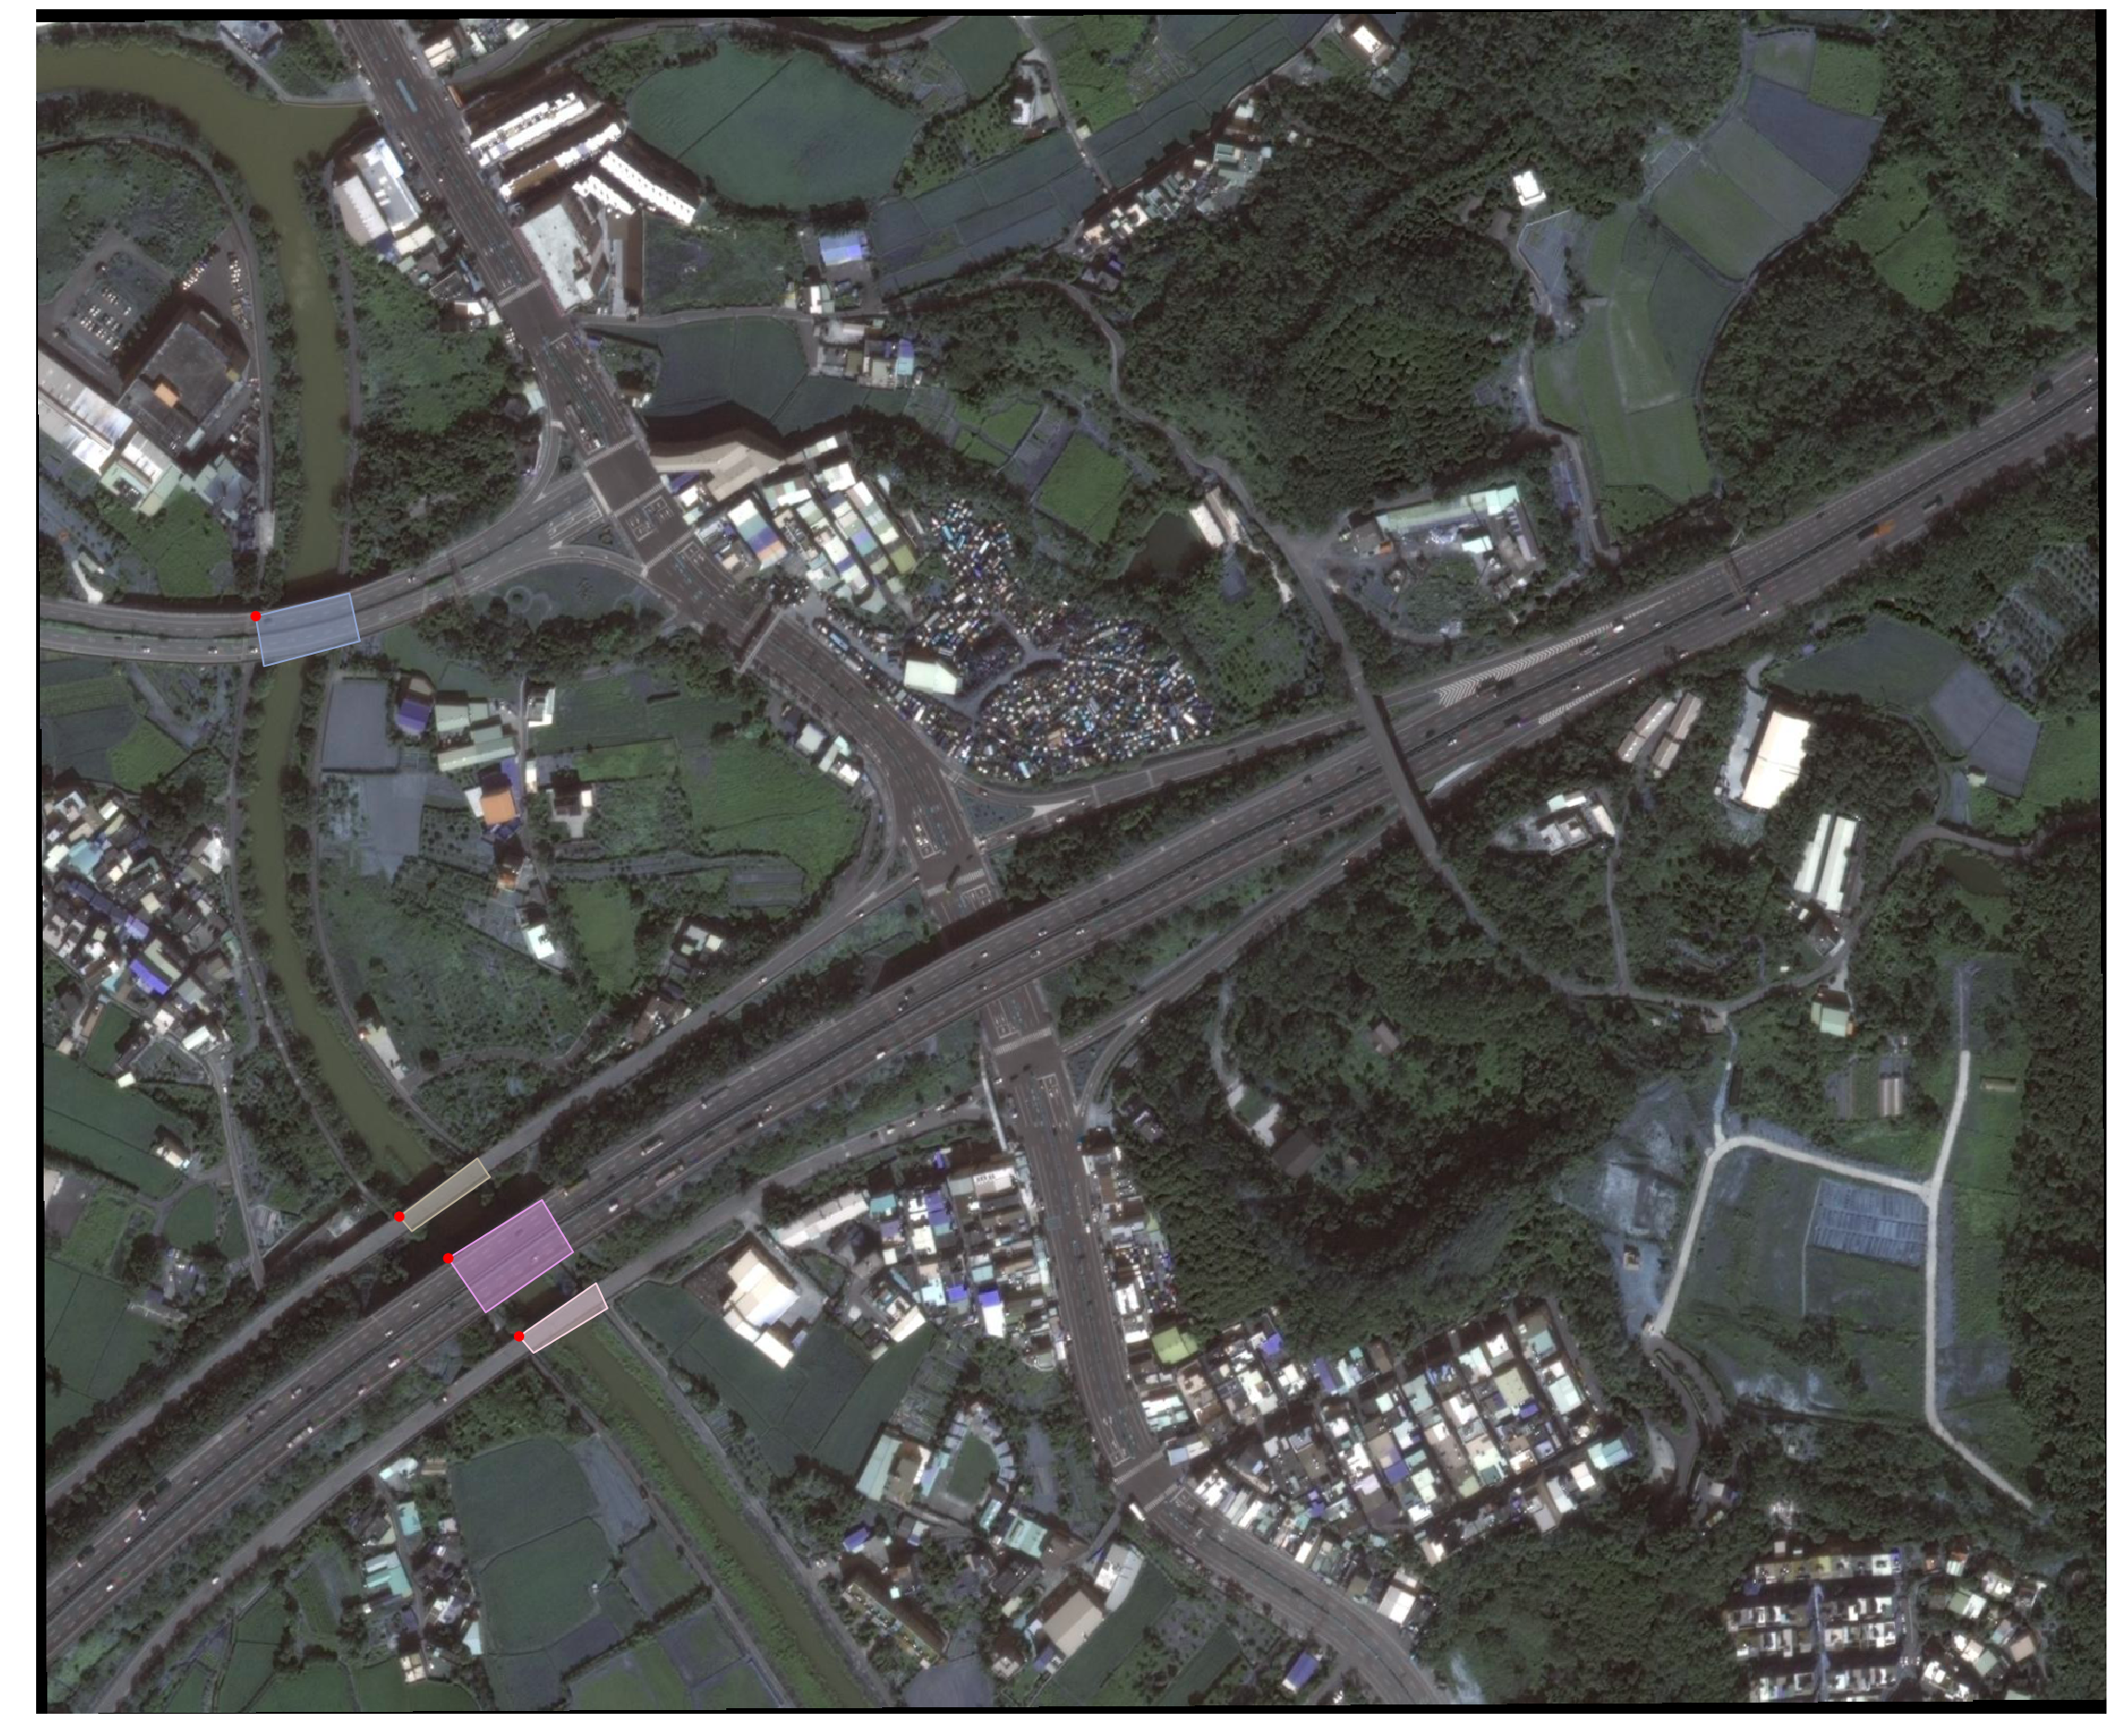

In [44]:
imgids = training.getImgIds(catNms=['bridge'])
imgid = imgids[0]
#img = training.loadImgs(imgid)[0]

plt.figure(figsize=(40,40))
annotations = training.loadAnns(imgId=imgid)
training.showAnns(annotations, imgid, 2)

## 2. Number of training images

In [8]:
len(all_img_df)

1409

## 3. Scatter plot of image sizes

(0, 9000)

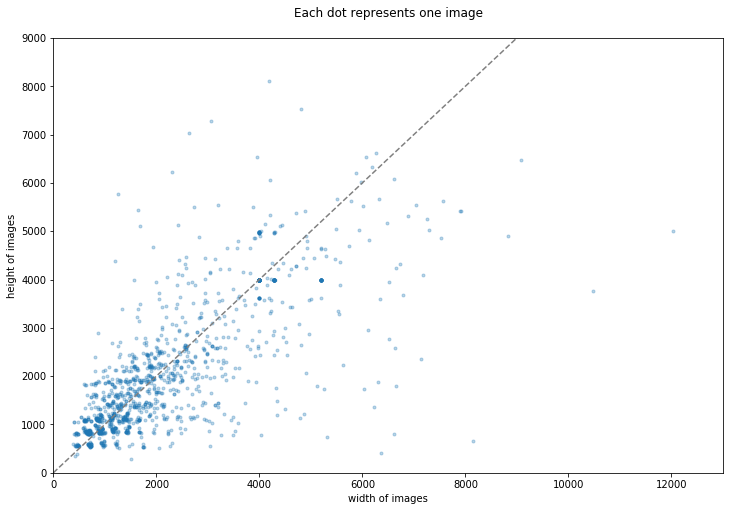

In [25]:
sizes = []
for file in sorted(os.listdir(TRAIN_IMAGES_DIR)):
    im = Image.open(TRAIN_IMAGES_DIR + file)
    width, height = im.size
    sizes.append([width, height])
sizes_df = pd.DataFrame(sizes, columns=["width","height"])

plt.figure(figsize=(12,8))
plt.plot(sizes_df.width, sizes_df.height, '.', alpha=0.3)
plt.plot([0,9000],[0,9000],'--', color="gray")
plt.title("Each dot represents one image\n")
plt.xlabel("width of images")
plt.ylabel("height of images")
plt.xlim(0,13000)
plt.ylim(0,9000)

## 4. Minimum and maximum width and height of images

In [28]:
print (f"min width: {sizes_df.width.min()}      max width: {sizes_df.width.max()}")
print (f"min height: {sizes_df.height.min()}      max height: {sizes_df.height.max()}")

min width: 387      max width: 12029
min height: 278      max height: 8115


## 5. Summary of image features

In [15]:
pdu.summary(all_img_df)

column filled  n_unique uniques/filled    dtype     mean     std
0      img_id   100%      1409           100%    int64  1407.97  818.07
1  img_source   100%         3             0%   object      N/A     N/A
2         gsd   100%      1198            85%  float64     0.39    0.37
3    category   100%        15             1%   object      N/A     N/A
4  difficulty   100%         2             0%  float64     0.10    0.30

## 6. Frequency of images by source

In [16]:
all_img_df.img_source.value_counts()

GoogleEarth    1208
JL              116
GF               85
Name: img_source, dtype: int64

## 7. Distribution of ground sample distances (gsd) of images

/Users/baris.ozmen/miniconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


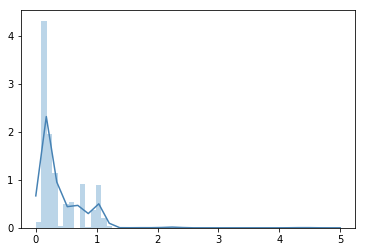

In [115]:
gsd_values = all_img_df["gsd"].dropna().values

h = plt.hist(gsd_values, bins=50, normed=1, alpha=0.3)

density = gaussian_kde( gsd_values )

xs = np.linspace(0,5,30)
plt.plot(xs, density(xs), color="steelblue")

### Take a look to all_labels_df

In [53]:
all_labels_df.head()

img_id   img_source       gsd       category  difficulty
0       0  GoogleEarth  0.146344          plane         0.0
1       0  GoogleEarth  0.146344  large-vehicle         0.0
2       0  GoogleEarth  0.146344  large-vehicle         0.0
3       0  GoogleEarth  0.146344  large-vehicle         0.0
4       0  GoogleEarth  0.146344  small-vehicle         0.0

## 8. Frequency of each object type across images

Frequency of objects vary between 325 (ground-track-field) and 28,068 (ship)

Text(0.5, 1.0, 'Frequency of each object type across aerial images')

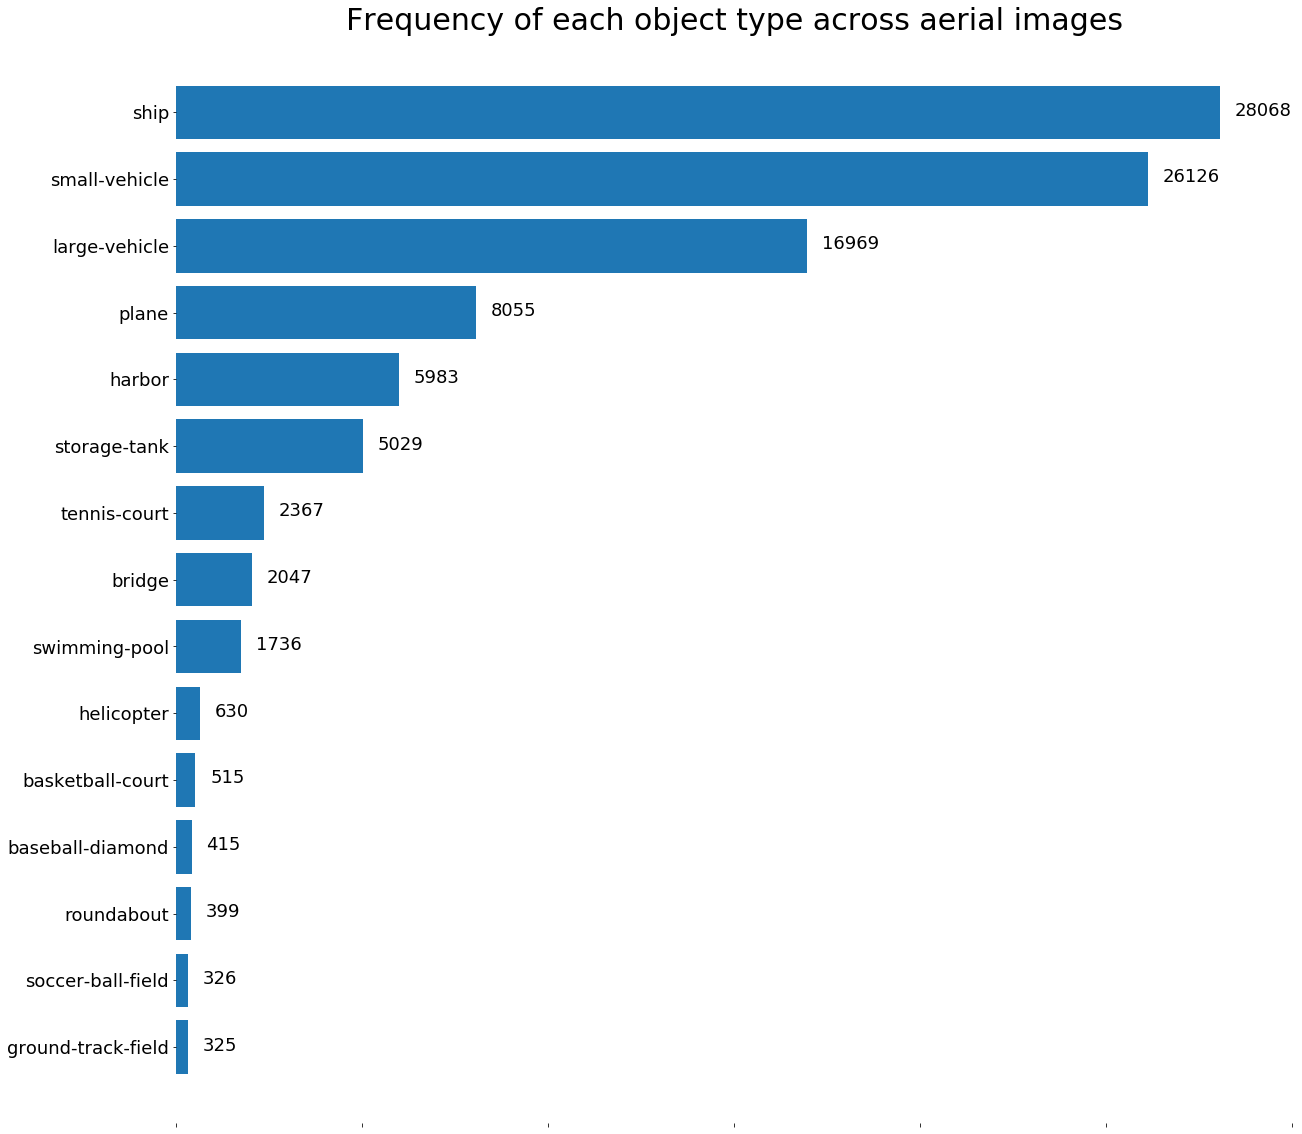

In [106]:
categs = all_labels_df["category"].value_counts(ascending=True)

plt.figure(figsize=(20,20))
plt.barh(categs.index, categs.values)

ax = plt.gca()
for i, val in enumerate(categs.values):
    ax.text(val + 400, i-0.05, str(val), fontsize=18)

ax.set_xlim(0,30000)
ax.tick_params(labelleft=True, labelbottom=False)

for spine in ax.spines.values():
    spine.set_visible(False)
    
ax.tick_params(axis='both', which='major', labelsize=18)
    
plt.title('Frequency of each object type across aerial images', fontsize=30)

### 9. Number of objects per image

Number of objects follows an exponential decay

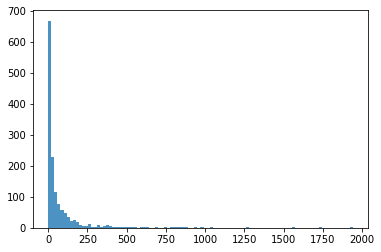

In [120]:
n_objects = all_labels_df.groupby("img_id").count()["category"].values

h = plt.hist(n_objects, bins=100, alpha=0.8)

### 10. Images by number of each object

In [134]:
df = all_labels_df.drop(columns=["gsd", "difficulty"]).copy()

for categ in all_labels_df.category.unique():
    df[categ] = df["category"]==categ
    
label_counts_df = df.groupby("img_id").sum()

label_counts_df.head()

plane  large-vehicle  small-vehicle  ship  harbor  ground-track-field  \
img_id                                                                          
0        21.0           27.0           59.0   0.0     0.0                 0.0   
1         0.0            0.0            0.0  17.0    17.0                 0.0   
2         0.0          257.0           24.0   0.0     0.0                 0.0   
5         0.0           99.0           31.0   0.0     0.0                 0.0   
8         0.0           36.0            3.0   0.0     0.0                 0.0   

        soccer-ball-field  tennis-court  baseball-diamond  swimming-pool  \
img_id                                                                     
0                     0.0           0.0               0.0            0.0   
1                     0.0           0.0               0.0            0.0   
2                     0.0           0.0               0.0            0.0   
5                     0.0           0.0               0.0            0.0   
8                     0.0           0.0               0.0            0.0   

        roundabout  basketball-court  storage-tank  bridge  helicopter  
img_id                                                                  
0              0.0               0.0           0.0     0.0         0.0  
1              0.0               0.0           0.0     0.0         0.0  
2              0.0               0.0           0.0     0.0         0.0  
5              0.0               0.0           0.0     0.0         0.0  
8              0.0               0.0           0.0     0.0         0.0

### 11. Co-occurrences and mutual exclusivity of object types across images

Correlation results are not surprising. High correlations are between ground-track-field/soccer-ball-field and helicopter/plane, becasue these tuples are tend to be in the same images. Again uninterestingly, planes are tennis-courts are negatively correlated, since it is unlikely to have a tennis court near an airport.

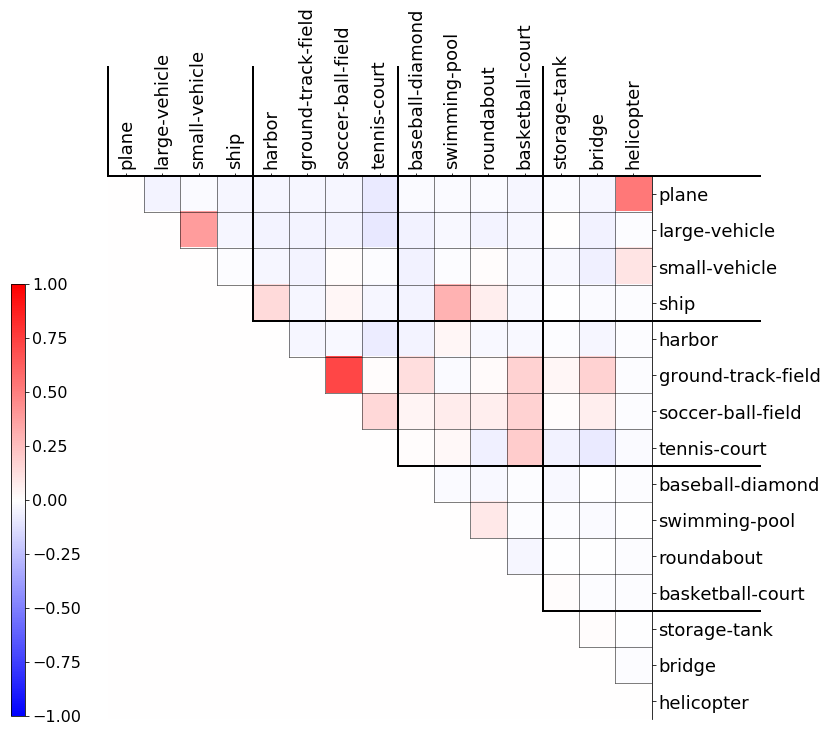

plot_heatmap_of_uppertriangle() call counter:  8
plot_heatmap_of_uppertriangle()'s runtime:  0.4519 sec.


In [144]:
PlotOp.plot_heatmap_of_uppertriangle(
    label_counts_df.corr().values,
    label_counts_df.columns,
    label_counts_df.columns,
    sg_length=-3,
    figsize=(10,10)
)